# Cube in a Box

### Visualizing Data


The [OpenDatacube](https://github.com/opendatacube) provides an integrated gridded data analysis environment capable of delivering decades of analysis ready earth observation satellite and related data from multiple satellite and other acquisition systems.

Cube in a box is an easy to install implementation of the OpenDataCube that provides small case study notebook examples of the open datacubes capabilities.



Cube in a box automatically indexes the landsat path/rows associated with the extent specified in the cube in a box config file. This notebook demonstrates how to load a specific time slice from the landsat archive over the extent and visualise bands.

This notebook touches briefly on some the implimented features of the Datacube module, and is only intended to demonstrate functionality.

In [1]:
%matplotlib inline
import datacube #Load the datacube library
import folium
from datetime import datetime
from utils.utils import threeBandImage
from utils.utils import loadConfigExtent


Let's first explore the extent area that had been specified in the config file. 
Zoom to the red bounding box in the below map to confirm this is the extent that you're looking to experiment explore. If the config parameters have been set correctly there will be a bounding box over your case study area, if the bounding box is in the right location then Cube in a Box has indexed all relavent Landsat 8 path/rows corresponding the extent.

In [2]:
extent, boundingBox = loadConfigExtent()
m = folium.Map(zoom_start = 1)
folium.PolyLine(boundingBox, color = 'red').add_to(m)
m

In [3]:
#Creating an instance of the datacube.
dc = datacube.Datacube(app='dc-example')

Select a time slice to load into an XArray using the 'data_range' variable, an output projection (epsg code) and the measurement sensors to be loaded for this visualisation.

Landsat 8 measurement options are:

             ('1', 'coastal_aerosol')
             ('2', 'blue')
             ('3', 'green')
             ('4', 'red')
             ('5', 'nir')
             ('6', 'swir1')
             ('7', 'swir2')
             ('8', 'panchromatic')
             ('9', 'cirrus')
             ('10', 'lwir1')
             ('11', 'lwir2')
             ('QUALITY', 'quality')]



In [4]:
date_range = (datetime(2017,3,12),datetime(2017,3,14))
ds = dc.load(product='ls8_level1_usgs', x=(extent[0],extent[1]), y=(extent[2],extent[3]), 
             output_crs = 'epsg:28355', resolution = (-30,30), time = date_range, 
             measurements = ('red','green','blue'))

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


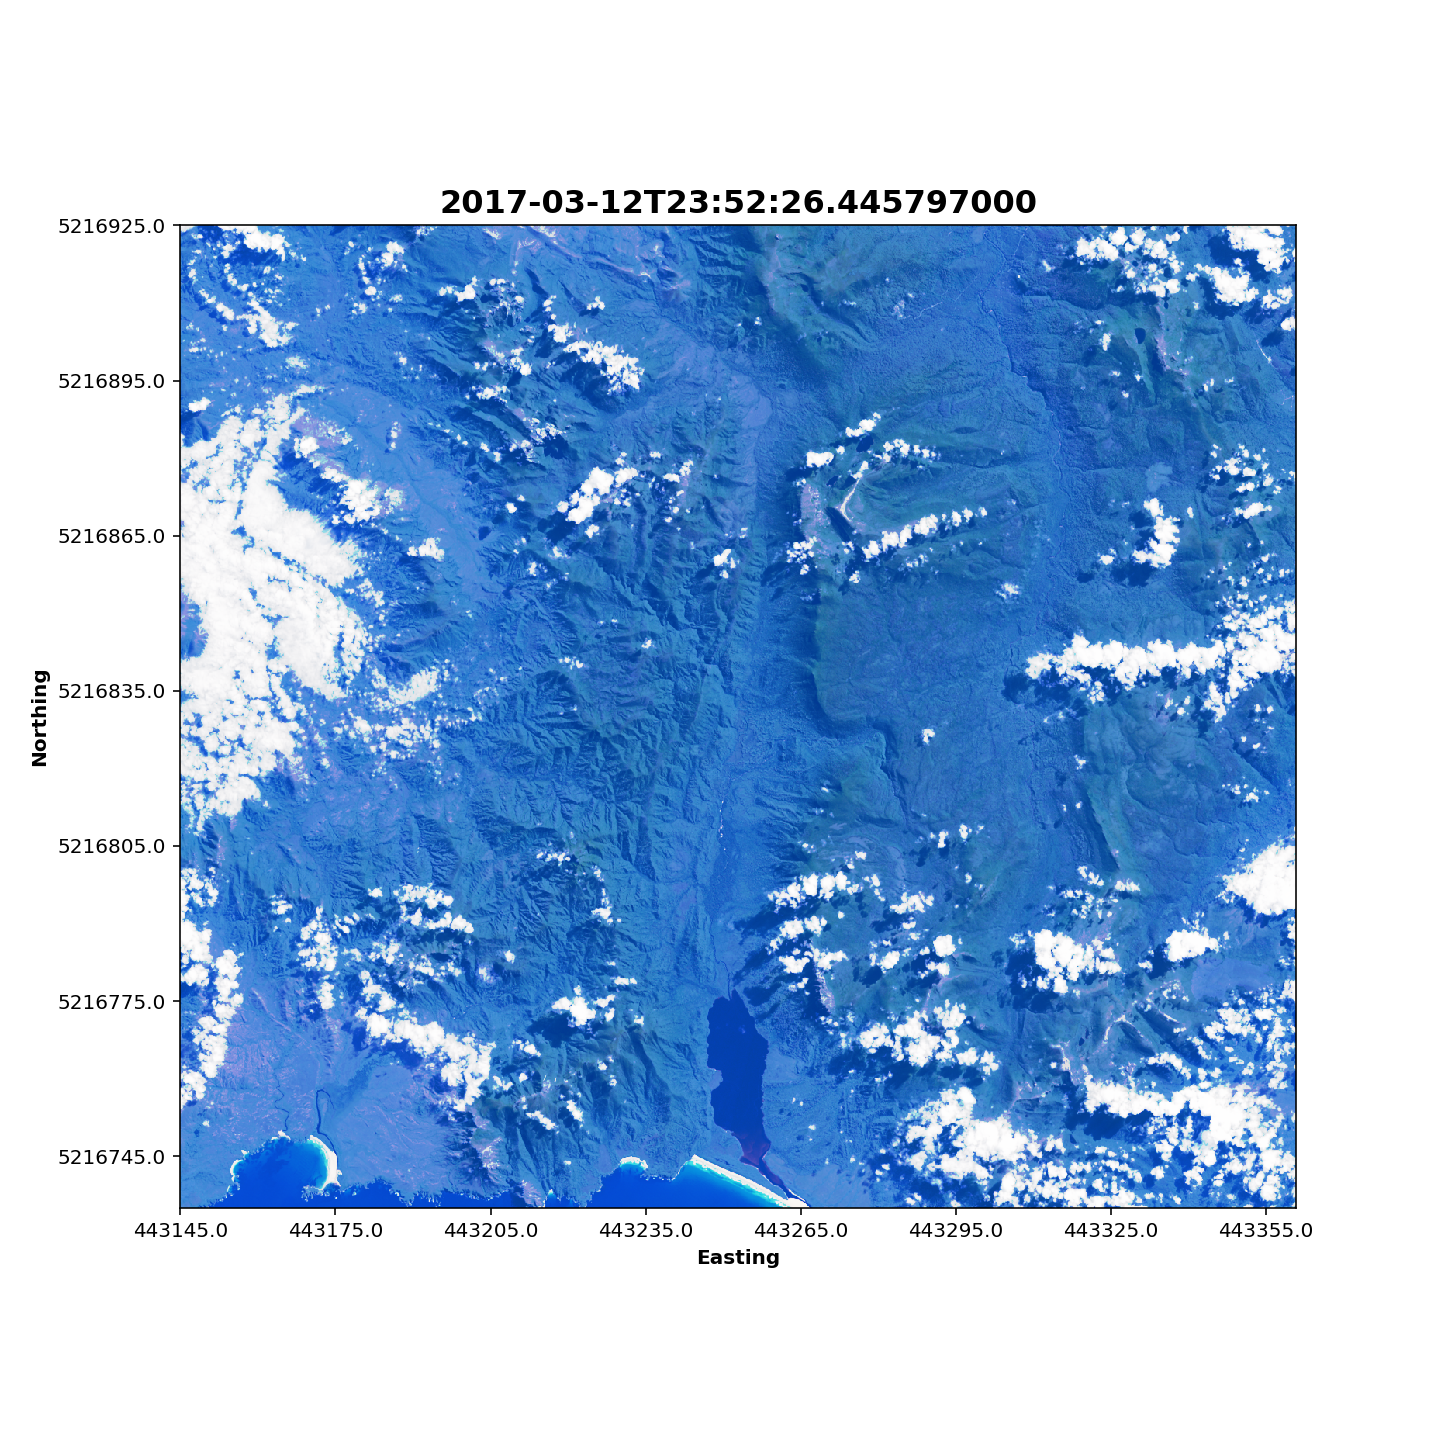

Text(0,0.5,'Northing')

In [5]:
%pylab notebook
figsize = [10,10]
time = 0
img_toshow = threeBandImage(ds,bands = ['red', 'green', 'blue'], time = time)
fig = plt.figure(figsize = figsize)
imshow(img_toshow)
ax = plt.gca()
ax.set_title(str(ds.time[time].values), fontweight = 'bold', fontsize = 16)
ax.set_xticklabels(ds.x.values)
ax.set_yticklabels(ds.y.values)
ax.set_xlabel('Easting', fontweight = 'bold')
ax.set_ylabel('Northing', fontweight = 'bold')

In [6]:
##Load
print (ds)

<xarray.Dataset>
Dimensions:  (time: 1, x: 1439, y: 1267)
Coordinates:
  * time     (time) datetime64[ns] 2017-03-12T23:52:26.445797
  * y        (y) float64 5.217e+06 5.217e+06 5.217e+06 5.217e+06 5.217e+06 ...
  * x        (x) float64 4.431e+05 4.431e+05 4.432e+05 4.432e+05 4.432e+05 ...
Data variables:
    red      (time, y, x) int16 15800 14191 12983 11002 10106 10130 9190 ...
    green    (time, y, x) int16 15415 13831 12980 11105 10315 10151 9334 ...
    blue     (time, y, x) int16 15732 14344 13446 11655 11022 10969 10156 ...
Attributes:
    crs:      epsg:28355
